In [1]:
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
ruta = "/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto"
print(os.listdir(ruta))

['EEG During Mental Arithmetic Tasks', '.DS_Store', 'Proyecto.ipynb', 'eeg-during-mental-arithmetic-tasks-1.0.0', 'Proyecto_profe.ipynb', 'CAP sleep data base Redstone .ipynb', '.ipynb_checkpoints']


In [16]:
ruta = "/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0"
print("Contenido del folder:")
print(os.listdir(ruta))

for archivo in archivos:
    raw = mne.io.read_raw_edf(os.path.join(ruta, archivo), preload=True)
    print(raw.info['ch_names'])



Contenido del folder:
['Subject20_1.edf', 'Subject06_2.edf', 'Subject04_1.edf', 'Subject22_2.edf', 'Subject06_1.edf', 'Subject20_2.edf', 'Subject22_1.edf', 'Subject04_2.edf', 'RECORDS', 'Subject26_1.edf', 'Subject00_2.edf', 'Subject19_2.edf', 'Subject02_1.edf', 'Subject24_2.edf', 'Subject00_1.edf', 'Subject26_2.edf', 'Subject19_1.edf', 'Subject24_1.edf', 'Subject02_2.edf', 'Subject07_1.edf', 'Subject21_2.edf', 'Subject23_1.edf', 'Subject05_2.edf', 'Subject21_1.edf', 'Subject07_2.edf', 'Subject05_1.edf', 'Subject23_2.edf', 'Subject01_1.edf', 'Subject27_2.edf', 'Subject25_1.edf', 'Subject03_2.edf', 'Subject18_1.edf', 'Subject27_1.edf', 'Subject01_2.edf', 'Subject03_1.edf', 'Subject25_2.edf', 'Subject18_2.edf', 'Subject14_2.edf', 'Subject32_1.edf', 'subject-info.csv', 'Subject29_2.edf', 'Subject30_2.edf', 'Subject16_1.edf', 'Subject32_2.edf', 'Subject14_1.edf', 'Subject29_1.edf', 'Subject16_2.edf', 'Subject30_1.edf', 'Subject09_1.edf', 'Subject12_2.edf', 'Subject34_1.edf', 'Subject10_1.ed

In [17]:
archivos_edf = sorted([f for f in os.listdir(ruta) if f.endswith(".edf")])
print("Archivos totales:", len(archivos_edf))
print(archivos_edf[:6])  
datos = {}

for archivo in archivos_edf:
    print(f"\nCargando: {archivo}")
    path = os.path.join(ruta, archivo)
    
    raw = mne.io.read_raw_edf(path, preload=True, verbose=False)
    datos[archivo] = raw


Archivos totales: 72
['Subject00_1.edf', 'Subject00_2.edf', 'Subject01_1.edf', 'Subject01_2.edf', 'Subject02_1.edf', 'Subject02_2.edf']

Cargando: Subject00_1.edf

Cargando: Subject00_2.edf

Cargando: Subject01_1.edf

Cargando: Subject01_2.edf

Cargando: Subject02_1.edf

Cargando: Subject02_2.edf

Cargando: Subject03_1.edf

Cargando: Subject03_2.edf

Cargando: Subject04_1.edf

Cargando: Subject04_2.edf

Cargando: Subject05_1.edf

Cargando: Subject05_2.edf

Cargando: Subject06_1.edf

Cargando: Subject06_2.edf

Cargando: Subject07_1.edf

Cargando: Subject07_2.edf

Cargando: Subject08_1.edf

Cargando: Subject08_2.edf

Cargando: Subject09_1.edf

Cargando: Subject09_2.edf

Cargando: Subject10_1.edf

Cargando: Subject10_2.edf

Cargando: Subject11_1.edf

Cargando: Subject11_2.edf

Cargando: Subject12_1.edf

Cargando: Subject12_2.edf

Cargando: Subject13_1.edf

Cargando: Subject13_2.edf

Cargando: Subject14_1.edf

Cargando: Subject14_2.edf

Cargando: Subject15_1.edf

Cargando: Subject15_2.edf


In [7]:
ruta = "/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject20_1.edf"
raw = mne.io.read_raw_edf(ruta, preload=True)
print(raw)


Extracting EDF parameters from /Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject20_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
<RawEDF | Subject20_1.edf, 21 x 91000 (182.0 s), ~14.6 MiB, data loaded>


In [11]:
ruta = "/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject20_1.edf" #Un ejemplo de un sujeto
raw = mne.io.read_raw_edf(ruta, preload=True)
info_canales = pd.DataFrame({
    "Canal": raw.ch_names,
    "Tipo": raw.get_channel_types(),
    "Frecuencia_muestreo": [raw.info["sfreq"]] * len(raw.ch_names)
})

print("\nInformación de canales\n")
print(info_canales.to_string(index=False))



Extracting EDF parameters from /Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject20_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...

Información de canales

    Canal Tipo  Frecuencia_muestreo
  EEG Fp1  eeg                500.0
  EEG Fp2  eeg                500.0
   EEG F3  eeg                500.0
   EEG F4  eeg                500.0
   EEG F7  eeg                500.0
   EEG F8  eeg                500.0
   EEG T3  eeg                500.0
   EEG T4  eeg                500.0
   EEG C3  eeg                500.0
   EEG C4  eeg                500.0
   EEG T5  eeg                500.0
   EEG T6  eeg                500.0
   EEG P3  eeg                500.0
   EEG P4  eeg                500.0
   EEG O1  eeg                500.0
   EEG O2  eeg                500.0
   EEG Fz  eeg                500.0
   EEG Cz  eeg                50

In [19]:
archivos = [f for f in os.listdir(ruta) if f.endswith('.edf')]
reposo = [f for f in archivos if '_1' in f]
tarea = [f for f in archivos if '_2' in f]


In [21]:
archivos_edf = [f for f in archivos if f.lower().endswith('.edf')]
# Archivos de reposo y tarea
reposo = [f for f in archivos_edf if '_1' in f]
tarea  = [f for f in archivos_edf if '_2' in f]
print("Reposo:", reposo)
print("Tarea:", tarea)


Reposo: ['Subject20_1.edf', 'Subject04_1.edf', 'Subject06_1.edf', 'Subject22_1.edf', 'Subject26_1.edf', 'Subject02_1.edf', 'Subject00_1.edf', 'Subject19_1.edf', 'Subject24_1.edf', 'Subject07_1.edf', 'Subject23_1.edf', 'Subject21_1.edf', 'Subject05_1.edf', 'Subject01_1.edf', 'Subject25_1.edf', 'Subject18_1.edf', 'Subject27_1.edf', 'Subject03_1.edf', 'Subject32_1.edf', 'Subject16_1.edf', 'Subject14_1.edf', 'Subject29_1.edf', 'Subject30_1.edf', 'Subject09_1.edf', 'Subject34_1.edf', 'Subject10_1.edf', 'Subject12_1.edf', 'Subject28_1.edf', 'Subject15_1.edf', 'Subject31_1.edf', 'Subject33_1.edf', 'Subject17_1.edf', 'Subject13_1.edf', 'Subject35_1.edf', 'Subject08_1.edf', 'Subject11_1.edf']
Tarea: ['Subject06_2.edf', 'Subject22_2.edf', 'Subject20_2.edf', 'Subject04_2.edf', 'Subject00_2.edf', 'Subject19_2.edf', 'Subject24_2.edf', 'Subject26_2.edf', 'Subject02_2.edf', 'Subject21_2.edf', 'Subject05_2.edf', 'Subject07_2.edf', 'Subject23_2.edf', 'Subject27_2.edf', 'Subject03_2.edf', 'Subject01_2.e

In [22]:
archivos = os.listdir(ruta)
archivos_edf = [f for f in archivos if f.lower().endswith('.edf')]
reposo = [f for f in archivos_edf if '_1' in f]
tarea  = [f for f in archivos_edf if '_2' in f]
df_canales = pd.DataFrame()

# Leer archivos de reposo
for archivo in reposo:
    raw = mne.io.read_raw_edf(os.path.join(ruta, archivo), preload=True)
    info = pd.DataFrame({
        "Sujeto": archivo,
        "Canal": raw.ch_names,
        "Tipo": raw.get_channel_types(),
        "Frecuencia_muestreo": [raw.info["sfreq"]] * len(raw.ch_names)
    })
    df_canales = pd.concat([df_canales, info], ignore_index=True)

# Tabla completa
df_canales.to_csv("tabla_canales_todos_los_sujetos.csv", index=False)

print(df_canales)


Extracting EDF parameters from /Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject20_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject04_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 84999  =      0.000 ...   169.998 secs...
Extracting EDF parameters from /Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-a

In [23]:
#Filtrado de señales
raw.filter(l_freq=1, h_freq=40)  
raw.notch_filter(50)              


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edg

<RawEDF | Subject11_1.edf, 21 x 91000 (182.0 s), ~14.6 MiB, data loaded>

In [24]:
#Método CAR
raw.set_eeg_reference('average', projection=True)


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawEDF | Subject11_1.edf, 21 x 91000 (182.0 s), ~14.6 MiB, data loaded>

In [33]:
reposo = raw.copy().crop(tmin=0, tmax=60)   
tarea = raw.copy().crop(tmin=60, tmax=120)  
print(reposo)
print(tarea)


<RawEDF | Subject11_1.edf, 21 x 30001 (60.0 s), ~4.8 MiB, data loaded>
<RawEDF | Subject11_1.edf, 21 x 30001 (60.0 s), ~4.8 MiB, data loaded>


In [36]:
data_reposo = reposo.get_data()  # Conversión a numpy
data_tarea = tarea.get_data()
print(data_reposo)
print(data_tarea)


[[-4.23516474e-21  1.24893747e-06  2.36074934e-06 ...  1.77177497e-06
   1.74867955e-06  1.82690885e-06]
 [ 3.81164826e-21  1.63926529e-06  2.92248604e-06 ... -5.76634008e-06
  -4.89305511e-06 -4.36953042e-06]
 [-8.47032947e-22  2.33225516e-07  4.57098501e-07 ...  6.25302837e-06
   6.40441294e-06  6.22302280e-06]
 ...
 [-3.38813179e-21 -2.45835176e-06 -4.61339619e-06 ... -7.50101097e-08
   5.52924984e-07  1.15324953e-06]
 [-8.47032947e-22  1.78963375e-07  3.21949237e-07 ... -2.07550189e-06
  -2.22150949e-06 -2.54421485e-06]
 [-1.69406589e-20  1.97827790e-06  4.18040293e-06 ... -4.02948999e-05
  -3.97593513e-05 -3.96620495e-05]]
[[ 1.82690885e-06  1.97236293e-06  2.13488993e-06 ...  5.73574433e-06
   5.23057601e-06  4.84353517e-06]
 [-4.36953042e-06 -4.27527472e-06 -4.63304366e-06 ...  1.76998439e-05
   1.66466826e-05  1.51094493e-05]
 [ 6.22302280e-06  5.72900040e-06  4.99265634e-06 ...  9.79901068e-06
   7.89187251e-06  6.01049084e-06]
 ...
 [ 1.15324953e-06  1.71466311e-06  2.2389311

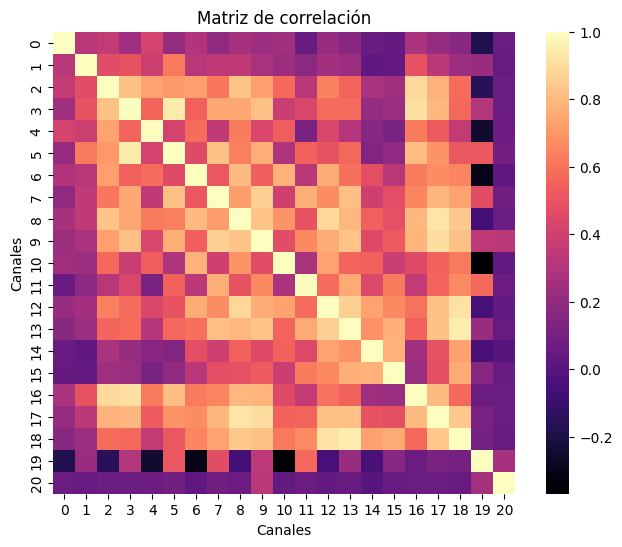

In [51]:
#Correlación entre canales
corr_matrix = np.corrcoef(data_tarea)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='magma', square=True)
plt.title("Matriz de correlación")
plt.xlabel("Canales")
plt.ylabel("Canales")
plt.show()


In [48]:
from scipy.signal import coherence

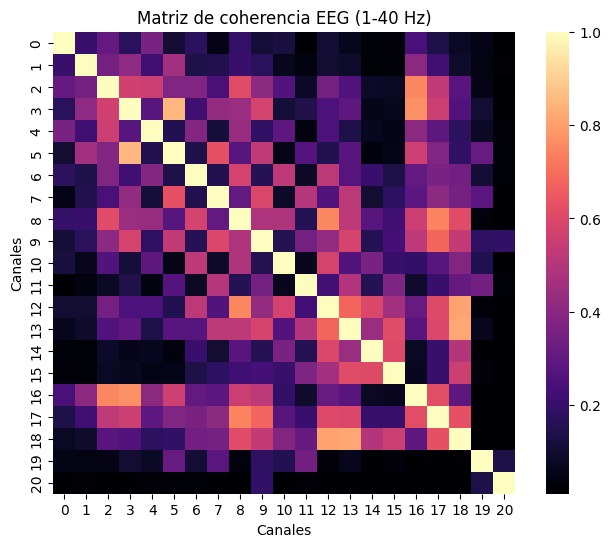

In [47]:

sfreq = int(raw.info['sfreq'])
n_channels = len(raw.ch_names)
coh_matrix = np.zeros((n_channels, n_channels))

data = raw.get_data()

for i in range(n_channels):
    for j in range(n_channels):
        f, Cxy = coherence(data[i], data[j], fs=sfreq, nperseg=1024)
        coh_matrix[i, j] = np.mean(Cxy[(f>=1) & (f<=40)])

plt.figure(figsize=(8,6))
sns.heatmap(coh_matrix, cmap='magma', square=True)
plt.title("Matriz de coherencia EEG (1-40 Hz)")
plt.xlabel("Canales")
plt.ylabel("Canales")
plt.show()


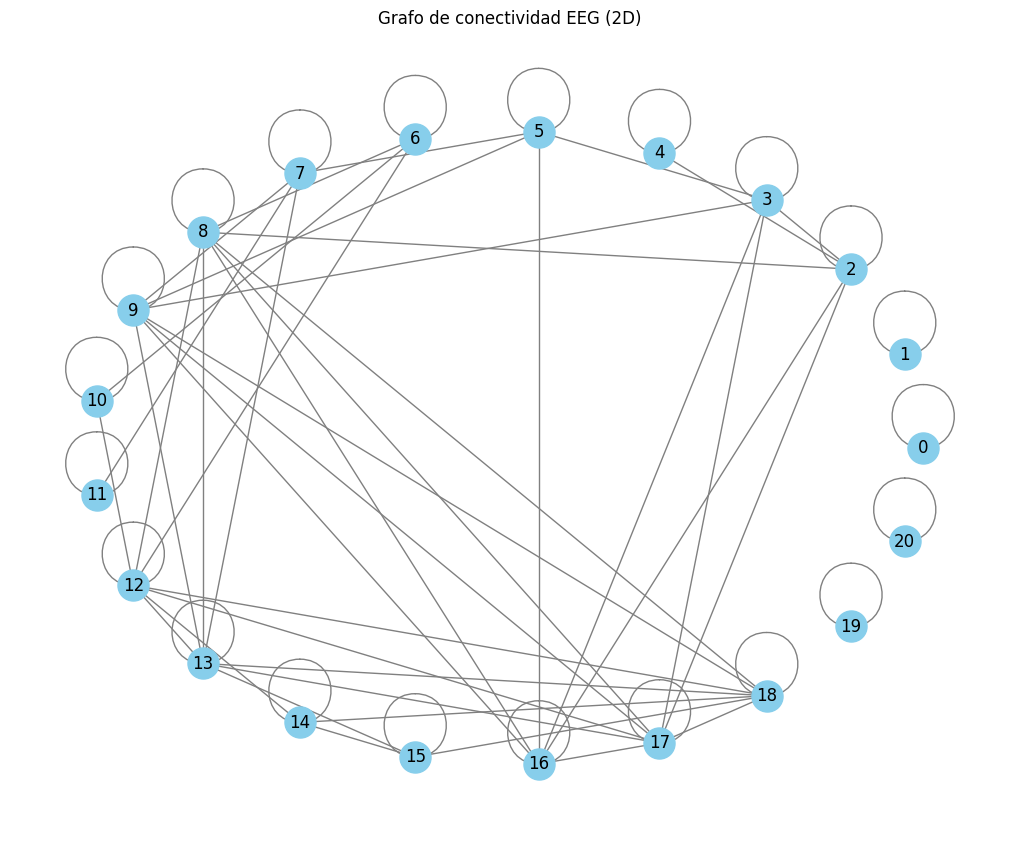

In [55]:
threshold = 0.5  
adj_matrix = coh_matrix.copy()
adj_matrix[adj_matrix < threshold] = 0

G = nx.from_numpy_array(adj_matrix)

plt.figure(figsize=(10,8))
pos = nx.circular_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')
plt.title("Grafo de conectividad EEG (2D)")
plt.show()


In [58]:
pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.7 MB/s  0:00:009.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]━━━━ 1/2 [plotly]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
import plotly.graph_objects as go

In [62]:
# Posición en 3D según los electrodos 10/20
pos_3d = np.random.rand(n_channels, 3)  # por simplicidad, puedes ajustar según coordenadas reales
edge_x = []
edge_y = []
edge_z = []
for i in range(n_channels):
    for j in range(i+1, n_channels):
        if adj_matrix[i,j] > 0:  # solo conexiones fuertes
            x0, y0, z0 = pos_3d[i]
            x1, y1, z1 = pos_3d[j]
            edge_x += [x0, x1, None]
            edge_y += [y0, y1, None]
            edge_z += [z0, z1, None]
edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, 
                          line=dict(width=2, color='gray'), 
                          hoverinfo='none', 
                          mode='lines')
node_trace = go.Scatter3d(x=pos_3d[:,0], y=pos_3d[:,1], z=pos_3d[:,2],
                          mode='markers+text',
                          marker=dict(size=8, color='skyblue'),
                          text=raw.ch_names,
                          textposition="top center")
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(title='Grafo de conectividad EEG (3D)', showlegend=False)
fig.show()


Media: 0.2996809433716142
Varianza: 0.06669127297237051
Desviación estándar: 0.2582465352572431
Umbral +1σ: 0.5579274786288573
Umbral +2σ: 0.8161740138861004
Umbral 80 percentil: 0.5232660052474258


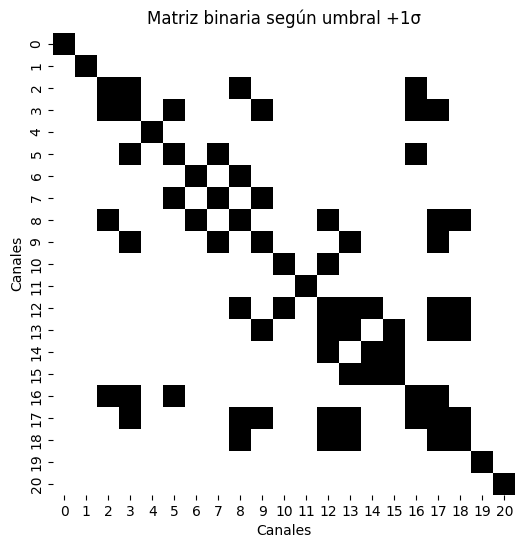

In [64]:
matrix = coh_matrix  
media = np.mean(matrix)
varianza = np.var(matrix)
desviacion = np.std(matrix)
print("Media:", media)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)
#Umbrales
umbral_1sigma = media + desviacion
umbral_2sigma = media + 2*desviacion
umbral_percentil = np.percentile(matrix, 80) #percentil
print("Umbral +1σ:", umbral_1sigma)
print("Umbral +2σ:", umbral_2sigma)
print("Umbral 80 percentil:", umbral_percentil)

binary_matrix = np.where(matrix >= umbral_1sigma, 1, 0) #umbral + sygma

# Grafo
plt.figure(figsize=(8,6))
sns.heatmap(binary_matrix, cmap='Greys', square=True, cbar=False)
plt.title("Matriz binaria según umbral +1σ")
plt.xlabel("Canales")
plt.ylabel("Canales")
plt.show()


In [67]:
#Grado de cada nodo
grados = dict(G.degree())
hubs = sorted(grados.items(), key=lambda x: x[1], reverse=True)[:3]  # Nodo de mayor grado 
print("Hubs (nodo, grado):", hubs)
from networkx.algorithms.community import greedy_modularity_communities
#Comunidades
comunidades = list(greedy_modularity_communities(G))
for i, c in enumerate(comunidades):
    print(f"Comunidad {i+1}: {sorted(c)}")



Hubs (nodo, grado): [(17, 9), (12, 8), (3, 7)]
Comunidad 1: [2, 3, 5, 7, 16]
Comunidad 2: [10, 12, 14, 15]
Comunidad 3: [9, 13, 17, 18]
Comunidad 4: [6, 8]
Comunidad 5: [0]
Comunidad 6: [1]
Comunidad 7: [4]
Comunidad 8: [11]
Comunidad 9: [19]
Comunidad 10: [20]


In [69]:
#Eficiencia global
eficiencia_global = nx.global_efficiency(G)
print("Eficiencia global:", eficiencia_global)
#Eficiencia local por nodo
eficiencia_local_por_nodo = {}
for nodo in G.nodes():
    subgrafo = G.subgraph(list(G.neighbors(nodo)))
    eficiencia_local_por_nodo[nodo] = nx.global_efficiency(subgrafo)
print("Eficiencia local por nodo:", eficiencia_local_por_nodo)





Eficiencia global: 0.2813492063492062
Eficiencia local por nodo: {0: 0, 1: 0, 2: 0.8333333333333334, 3: 0.8, 4: 0, 5: 0.8333333333333334, 6: 1.0, 7: 0.8333333333333334, 8: 0.7666666666666667, 9: 0.8, 10: 1.0, 11: 0, 12: 0.7619047619047619, 13: 0.8, 14: 0.8333333333333334, 15: 0.8333333333333334, 16: 0.85, 17: 0.7678571428571429, 18: 0.95, 19: 0, 20: 0}
